In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_set=pd.read_csv('trainset.csv')
training_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/4/16,743.000000,744.059998,731.257996,741.840027,741.840027,3272800
1,1/5/16,746.450012,752.000000,738.640015,742.580017,742.580017,1950700
2,1/6/16,730.000000,747.179993,728.919983,743.619995,743.619995,1947000
3,1/7/16,730.309998,738.500000,719.059998,726.390015,726.390015,2963700
4,1/8/16,731.450012,733.229980,713.000000,714.469971,714.469971,2450900


In [8]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


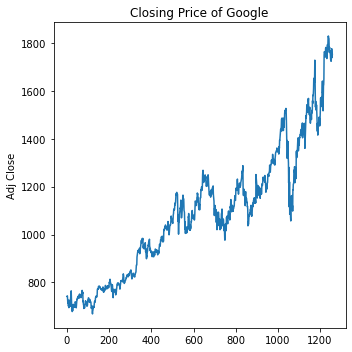

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Google")
plt.tight_layout()

Text(0.5, 1.0, 'Sales Volume')

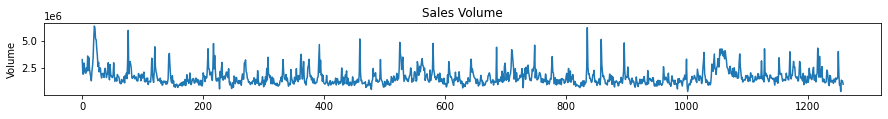

In [10]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)
training_set['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume")

In [11]:
training_set=training_set.iloc[:,1:2].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

X_train= training_set[0:1257]
y_train= training_set[1:1258]

X_train=np.reshape(X_train, (1257 , 1 , 1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [14]:
regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 5s 5ms/step - loss: 0.1256
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0887
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0705
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0621
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0579
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0554
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0517
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0501
Epoch 10/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0485
Epoch 11/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 12/200
40/40 [==============================] - 0s 5ms/step - loss: 0.0455
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 4ms/step - loss: 3.1833e-04
Epoch 195/200
40/40 [==============================] - 0s 5ms/step - loss: 3.0955e-04
Epoch 196/200
40/40 [==============================] - 0s 5ms/step - loss: 3.0911e-04
Epoch 197/200
40/40 [==============================] - 0s 4ms/step - loss: 3.1229e-04
Epoch 198/200
40/40 [==============================] - 0s 5ms/step - loss: 3.0913e-04
Epoch 199/200
40/40 [==============================] - 0s 5ms/step - loss: 3.1771e-04
Epoch 200/200
40/40 [==============================] - 0s 4ms/step - loss: 3.0937e-04


In [15]:
test_set = pd.read_csv('testset.csv')
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 668ms/step


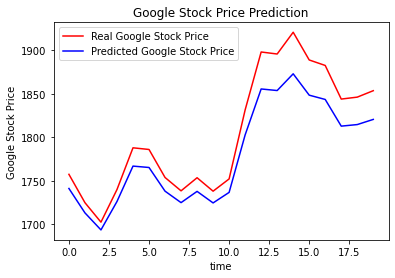

In [16]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()